## Message SPAM OR NOT SPAM USING CLASSIFICATION MODEL

In [19]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot  as plt
from collections import Counter
 
import nltk
from nltk.stem import  SnowballStemmer
from nltk.corpus import  stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
# from nltk.sentiment import  SentimentIntensityAnalyzer

import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import  accuracy_score,confusion_matrix,precision_score


import seaborn as sns

### Constants

In [20]:
File = r'sms_spam.csv'

### SEE Data

In [21]:
df= pd.read_csv(File,encoding='latin-1')
df.columns

df.shape
type(df)

pandas.core.frame.DataFrame

### Data cleaning

In [22]:
df.info()
df.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


v1            False
v2            False
Unnamed: 2     True
Unnamed: 3     True
Unnamed: 4     True
dtype: bool

In [23]:
# drop last three coloumn in dataset
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)


In [24]:
## rename the coloumn name

df.rename(columns={'v1':'target','v2':'text_data'},inplace=True)
df

,target,text_data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
## spam -1 ham is 0
encoder= LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df

,target,text_data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ï¿½_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [26]:
df.isnull().any()
df.isnull().sum()

target       0
text_data    0
dtype: int64

In [27]:
# # check duplicates
# df.duplicated().sum()

#  # remove duplicates
# df=df.drop_duplicates(keep='first')
# df.shape

# df.duplicated().sum()

### EDA

In [28]:

# or
df.target.value_counts()
# (df['target']==0).sum()

0    4825
1     747
Name: target, dtype: int64

## sentiment 


In [29]:
df

,target,text_data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ï¿½_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


4825


([<matplotlib.patches.Wedge at 0x1dbebd5f8b0>,
 [Text(-0.44971325876899215, -1.0038714981945516, 'Ham'),
  Text(0.4497133057636077, 1.0038714771419537, 'Spam')],
 [Text(-0.24529814114672294, -0.5475662717424826, '87%'),
  Text(0.24529816678014962, 0.5475662602592474, '13%')])

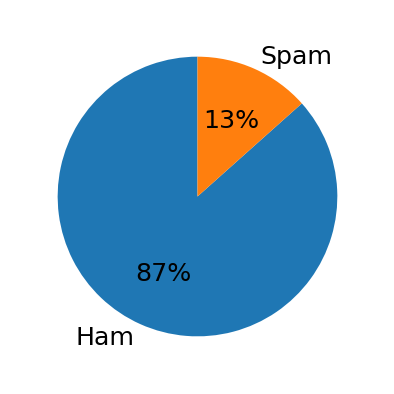

In [30]:
total_ham=(df.target==0).sum()
total_spam=(df.target==1).sum()
print(total_ham)
# %matplotlib inline
category_names=['Ham','Spam']
sizes =[total_ham,total_spam]
plt.figure(figsize=[2,2],dpi=227)
plt.pie(sizes,labels=category_names,textprops={'fontsize':8},startangle=90
,autopct='%1.0f%%')

([<matplotlib.patches.Wedge at 0x1dbebd8aa70>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.095132520518495, -0.49059633356029925, ' spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '87%'),
  Text(0.6388273036357887, -0.2861811945768412, '13%')])

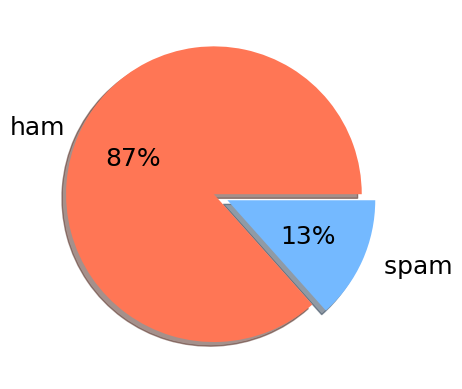

In [31]:
my_color=['#ff7655','#74b9ff']
category_names=['ham',' spam']
sizes =[total_ham,total_spam]
plt.pie(sizes,labels=category_names,shadow=0.1,textprops={'fontsize':18},
autopct='%1.0f%%',explode=[0,0.1],colors=my_color)


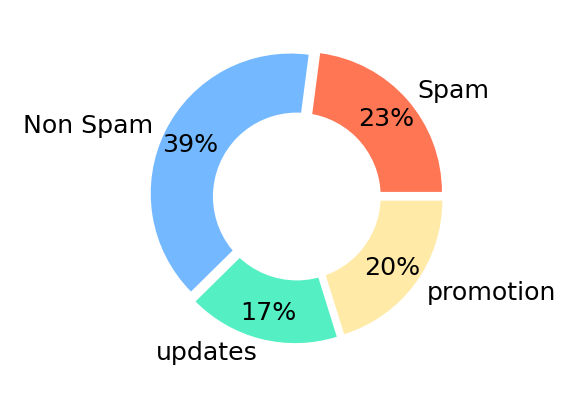

In [32]:
my_color=['#ff7655','#74b9ff','#55efc4','#ffeaa7']
plt.figure(figsize=[2,2],dpi=227)
offset=[0.05,0.05,0.05,0.05]
category_names=['Spam','Non Spam','updates','promotion']

sizes =[25,43,19,22]
plt.pie(sizes,labels=category_names,textprops={'fontsize':8},
autopct='%1.0f%%',colors=my_color,pctdistance=0.8,explode=offset)
 ## draw circle center
center_circle= plt.Circle((0,0),radius=0.6,fc='white')
plt.gca().add_artist(center_circle)

In [33]:
## data is  imbalanced 

## natural Preprocessing


In [34]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('shakespeare')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to C:\Users\KAMALJIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\KAMALJIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to C:\Users\KAMALJIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package shakespeare to C:\Users\KAMALJIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\KAMALJIT
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## sentiment

In [35]:
# Instantiate the sentiment analyzer
# sid = SentimentIntensityAnalyzer()

# Text to analyze
# text = "I love this product! It's amazing."

# Analyze sentiment
# sentiment_scores = sid.polarity_scores(text)

# Print the sentiment scores
# print(sentiment_scores)


In [36]:
df['num_char']=df['text_data'].apply(len) # no of len charater

 #no of word
df['word_len']=df['text_data'].apply(lambda x:len(nltk.word_tokenize(x)))
df['no_Sen']=df['text_data'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

,target,text_data,num_char,word_len,no_Sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162,35,4
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [37]:
df[['num_char','word_len','no_Sen']].describe()

,num_char,word_len,no_Sen
count,5572.000000,5572.000000,5572.000000
mean,80.364681,18.699390,1.996411
std,59.791982,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target']==0][['num_char','word_len','no_Sen']].describe() # ham anayliss

df[df['target']==1][['num_char','word_len','no_Sen']].describe() # ham anayliss

,num_char,word_len,no_Sen
count,747.000000,747.000000,747.000000
mean,139.340027,27.891566,3.021419
std,29.318159,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,133.000000,25.000000,2.000000
50%,150.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,225.000000,46.000000,9.000000


<AxesSubplot:xlabel='num_char', ylabel='Count'>

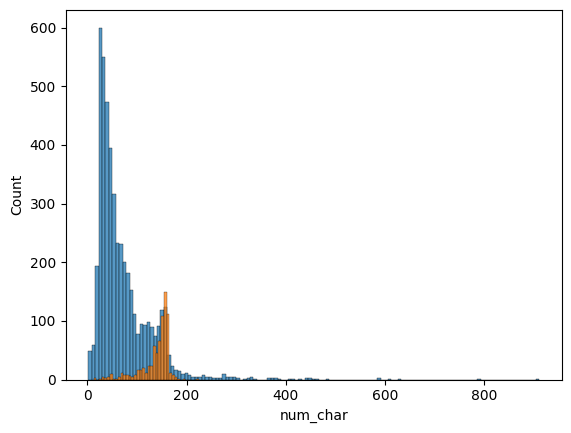

In [39]:
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'])

<AxesSubplot:xlabel='word_len', ylabel='Count'>

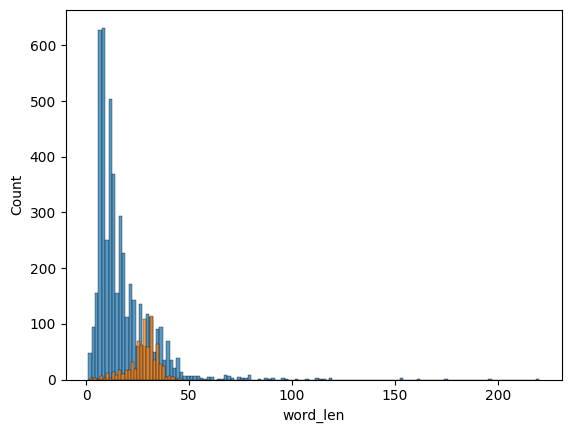

In [40]:
sns.histplot(df[df['target']==0]['word_len'])
sns.histplot(df[df['target']==1]['word_len'])

CPU times: total: 1.44 s
Wall time: 3.94 s


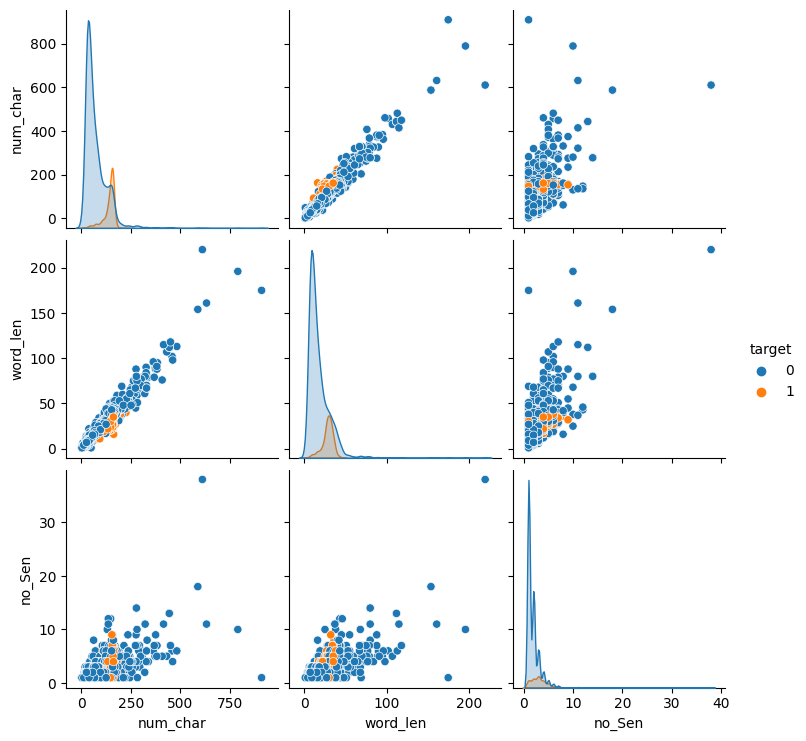

In [41]:
%%time
sns.pairplot(df,hue='target')

<AxesSubplot:>

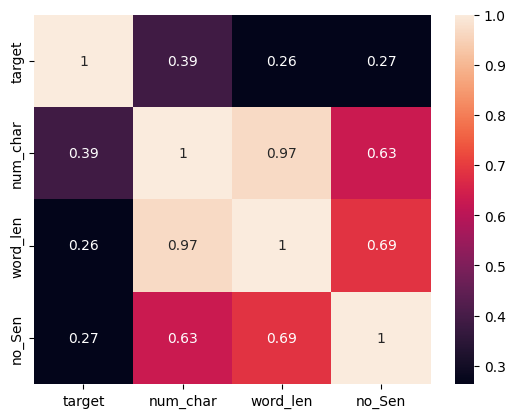

In [42]:
sns.heatmap(df.corr(),annot=True)

#### Data processing

#### Tokensing

In [43]:
msg='aLL of my brother @ @ANd My Sisters .WElcome to Punjab'
wrd= wordpunct_tokenize(msg.lower())
wrd

['all',
 'of',
 'my',
 'brother',
 '@',
 '@',
 'and',
 'my',
 'sisters',
 '.',
 'welcome',
 'to',
 'punjab']

### Remove stopwords

In [44]:
msg='aLL of my brother @ @ANd My Sisters .WElcome to Punjab'
wrd= wordpunct_tokenize(msg.lower())

stopword= set(stopwords.words('english'))
filter=[]
for list_1 in wrd:
    if list_1 not in stopword:
        filter.append(list_1)
filter

['brother', '@', '@', 'sisters', '.', 'welcome', 'punjab']

### stemming removes s , es ,ed, ing etc.

In [45]:
msg='aLL of my brother @ @ANd My Sisters .WElcome to Punjab'
wrd= wordpunct_tokenize(msg.lower())

stemmer= SnowballStemmer('english')
filter=[]

for list_1 in wrd:
    if list_1 not in stopword:
        stems= stemmer.stem(list_1)
        filter.append(stems)

print(filter)

['brother', '@', '@', 'sister', '.', 'welcom', 'punjab']


### punctuation 

In [46]:
msg='aLL of my brother @ @ANd My Sisters .WElcome to Punjab'
wrd= wordpunct_tokenize(msg.lower())
stemmer= SnowballStemmer('english')
filter=[]

for list_1 in wrd:
    if list_1 not in stopword and list_1.isalpha():
        stems= stemmer.stem(list_1)
        filter.append(stems)

print(filter)

['brother', 'sister', 'welcom', 'punjab']


### Generate function

In [47]:
def Make_gen_func(text, stop= set(stopwords.words('english'))
    ,stemmer= SnowballStemmer('english')):
   
    ## convert the message into lower case
    message= wordpunct_tokenize(text.lower())
    # empty list
    filter=[]
    for list_1 in message:
        if list_1 not in stop and (list_1.isalpha() or list_1.isalnum()) :

            stems= stemmer.stem(list_1)
            filter.append(stems)

            
    return ' '.join(filter)


In [48]:
# Make_gen_func('aLL of my brother @ @ANd My 323 424 Sisters .WElcome to Punjab')
Make_gen_func(df['text_data'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
%%time
df['transfer']= df['text_data'].apply(Make_gen_func)
df

CPU times: total: 188 ms
Wall time: 898 ms


,target,text_data,num_char,word_len,no_Sen,transfer
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,162,35,4,2nd time tri 2 contact u u ï ½750 pound prize ...
5568,0,Will ï¿½_ b going to esplanade fr home?,39,9,1,ï b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## Word cloud

(-0.5, 399.5, 199.5, -0.5)

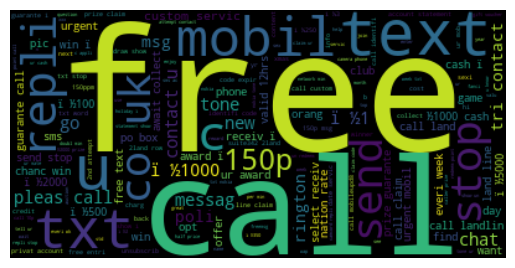

In [50]:

spam_wordcloud=WordCloud().generate(df[df['target']==1]['transfer'].str.cat(sep=" "))
plt.imshow(spam_wordcloud,interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

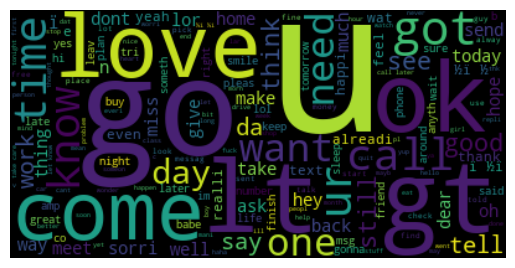

In [51]:
non_spam_wordcloud=WordCloud().generate(df[df['target']==0]['transfer'].str.cat(sep=" "))
plt.imshow(non_spam_wordcloud,interpolation='bilinear')
plt.axis('off')

In [52]:
spam_corpus = [word for msg in df[df['target'] == 1]['transfer'].tolist()
 for word in msg.split()]


In [53]:
len(spam_corpus)

13917

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'ï'),
  Text(2, 0, 'free'),
  Text(3, 0, '2'),
  Text(4, 0, 'u'),
  Text(5, 0, 'txt'),
  Text(6, 0, 'text'),
  Text(7, 0, 'ur'),
  Text(8, 0, 'mobil'),
  Text(9, 0, '4'),
  Text(10, 0, 'stop'),
  Text(11, 0, 'claim'),
  Text(12, 0, 'repli'),
  Text(13, 0, 'www'),
  Text(14, 0, 'prize'),
  Text(15, 0, 'week'),
  Text(16, 0, 'get'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'min'),
  Text(19, 0, 'uk'),
  Text(20, 0, 'cash'),
  Text(21, 0, 'servic'),
  Text(22, 0, 'send'),
  Text(23, 0, '150p'),
  Text(24, 0, 'nokia'),
  Text(25, 0, 'new'),
  Text(26, 0, 'award'),
  Text(27, 0, 'win'),
  Text(28, 0, 'urgent'),
  Text(29, 0, 'contact')])

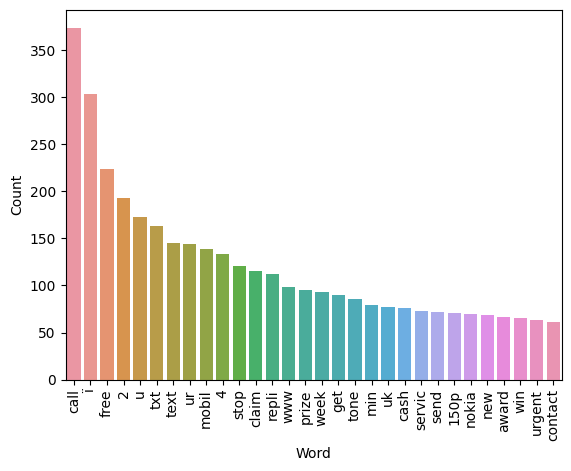

In [54]:
# pd.DataFrame(Counter(spam_corpus).most_common(30) )# most common thirty fords is used in spam sms
# sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30) )[0],
# pd.DataFrame(Counter(spam_corpus).most_common(30) )[1])counter = Counter(spam_corpus).most_common(30)

counter = Counter(spam_corpus).most_common(30)
counter_df = pd.DataFrame(counter, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=counter_df)
plt.xticks( rotation='vertical')



In [55]:
non_spam_corpus = [word for msg in df[df['target'] == 0]['transfer'].tolist()
 for word in msg.split()]
non_spam_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gonna',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'yes',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatï',


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'call'),
  Text(7, 0, 'come'),
  Text(8, 0, 'ok'),
  Text(9, 0, 'love'),
  Text(10, 0, 'know'),
  Text(11, 0, 'like'),
  Text(12, 0, 'ur'),
  Text(13, 0, 'day'),
  Text(14, 0, 'good'),
  Text(15, 0, 'got'),
  Text(16, 0, 'time'),
  Text(17, 0, '½ï'),
  Text(18, 0, 'want'),
  Text(19, 0, 'ï'),
  Text(20, 0, '4'),
  Text(21, 0, 'need'),
  Text(22, 0, 'one'),
  Text(23, 0, 'home'),
  Text(24, 0, 'lor'),
  Text(25, 0, 'sorri'),
  Text(26, 0, 'take'),
  Text(27, 0, 'see'),
  Text(28, 0, 'think'),
  Text(29, 0, 'da')])

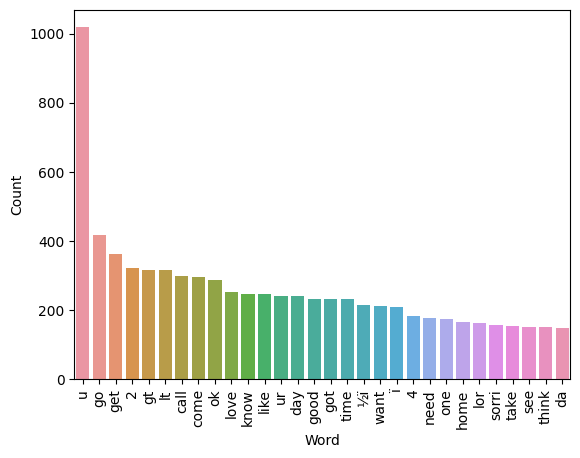

In [56]:
counter = Counter(non_spam_corpus).most_common(30)
counter_df = pd.DataFrame(counter, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=counter_df)
plt.xticks( rotation='vertical')


## Model Building

 ### ALL MESSAGE

In [57]:
cv= CountVectorizer()
x=cv.fit_transform(df['transfer']).toarray()

In [58]:
x.shape

(5572, 7243)

In [59]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [61]:
gnb = GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

### F1_score (2*precision*recall)/(precision+recall)

In [62]:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred1)}')
print(confusion_matrix(y_test,y_pred1))
print(f'Recall: {metrics.recall_score(y_test,y_pred1)}')
print(f"Precision:{precision_score(y_test,y_pred1)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred1)}")

accuracy: 0.8780269058295964
[[846 111]
 [ 25 133]]
Recall: 0.8417721518987342
Precision:0.5450819672131147
f1_score: 0.6616915422885573


In [63]:
bnb.fit(X_train,y_train)
y_pred2= bnb.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred2)}')
print(confusion_matrix(y_test,y_pred1))
print(f'Recall: {metrics.recall_score(y_test,y_pred2)}')
print(f"Precision:{precision_score(y_test,y_pred2)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred2)}")

accuracy: 0.9757847533632287
[[846 111]
 [ 25 133]]
Recall: 0.8481012658227848
Precision:0.9781021897810219
f1_score: 0.9084745762711864


In [64]:
mnb.fit(X_train,y_train)
y_pred3= mnb.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred3)}')
print(confusion_matrix(y_test,y_pred3))
print(f'Recall: {metrics.recall_score(y_test,y_pred3)}')
print(f"Precision:{precision_score(y_test,y_pred3)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred3)}")

accuracy: 0.9802690582959641
[[948   9]
 [ 13 145]]
Recall: 0.9177215189873418
Precision:0.9415584415584416
f1_score: 0.9294871794871796


## method 2

In [65]:
tf=TfidfVectorizer(max_features=3000)
x=tf.fit_transform(df['transfer']).toarray()
x.shape

(5572, 3000)

In [66]:
y=y=df['target'].values
X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
gnb = GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [68]:
mnb.fit(X_train,y_train)
y_pred3= mnb.predict(x_test)
print(y_pred3)
print(f'accuracy: {accuracy_score(y_test,y_pred3)}')
print(confusion_matrix(y_test,y_pred3))
print(f'Recall: {metrics.recall_score(y_test,y_pred3)}')
print(f"Precision:{precision_score(y_test,y_pred3)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred3)}")

[0 0 0 ... 0 0 0]
accuracy: 0.9695067264573991
[[956   1]
 [ 33 125]]
Recall: 0.7911392405063291
Precision:0.9920634920634921
f1_score: 0.8802816901408451


In [69]:
gnb.fit(X_train,y_train)
y_pred2= gnb.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred2)}')
print(confusion_matrix(y_test,y_pred2))
print(f'Recall: {metrics.recall_score(y_test,y_pred2)}')
print(f"Precision:{precision_score(y_test,y_pred2)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred2)}")

accuracy: 0.8663677130044843
[[836 121]
 [ 28 130]]
Recall: 0.8227848101265823
Precision:0.5179282868525896
f1_score: 0.6356968215158925


In [70]:
bnb.fit(X_train,y_train)
y_pred1= bnb.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred1)}')
print(confusion_matrix(y_test,y_pred1))
print(f'Recall: {metrics.recall_score(y_test,y_pred1)}')
print(f"Precision:{precision_score(y_test,y_pred1)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred1)}")

accuracy: 0.9811659192825112
[[954   3]
 [ 18 140]]
Recall: 0.8860759493670886
Precision:0.9790209790209791
f1_score: 0.9302325581395349


In [71]:
adam_boost= AdaBoostClassifier()
adam_boost.fit(X_train,y_train)
y_pred2= adam_boost.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred2)}')
print(confusion_matrix(y_test,y_pred2))
print(f'Recall: {metrics.recall_score(y_test,y_pred2)}')
print(f"Precision:{precision_score(y_test,y_pred2)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred2)}")

accuracy: 0.9713004484304932
[[954   3]
 [ 29 129]]
Recall: 0.8164556962025317
Precision:0.9772727272727273
f1_score: 0.889655172413793


In [72]:


X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
g_boost= GradientBoostingClassifier()
g_boost.fit(X_train,y_train)
y_pred3= g_boost.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred3)}')
print(confusion_matrix(y_test,y_pred3))
print(f'Recall: {metrics.recall_score(y_test,y_pred3)}')
print(f"Precision:{precision_score(y_test,y_pred3)}")

print(f"f1_score: {metrics.f1_score(y_test,y_pred3)}")

accuracy: 0.9713004484304932
[[958   2]
 [ 30 125]]
Recall: 0.8064516129032258
Precision:0.984251968503937
f1_score: 0.8865248226950354


In [73]:


X_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)
r_boost= RandomForestClassifier()
r_boost.fit(X_train,y_train)
y_pred3= r_boost.predict(x_test)
print(f'accuracy: {accuracy_score(y_test,y_pred3)}')
print(confusion_matrix(y_test,y_pred3))
print(f'Recall: {metrics.recall_score(y_test,y_pred3)}')
print(f"Precision:{precision_score(y_test,y_pred3)}")
print(f"f1_score: {metrics.f1_score(y_test,y_pred3)}")

accuracy: 0.9748878923766816
[[941   0]
 [ 28 146]]
Recall: 0.8390804597701149
Precision:1.0
f1_score: 0.9125


In [75]:
import pickle
pickle.dump(tf,open("vectorizer.pkl",'wb'))
pickle.dump(r_boost,open("model.pkl","wb"))